### TP1

Parte 2:

1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCVen escala de grisas y visualizarlas.

2. Elija el numerode binsque crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

In [1]:
!pip install opencv-python
!pip install glob2


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [3]:
# Se define la ruta al archivo de datos
ruta_notebook = os.getcwd()
ruta_1 = ruta_notebook + '/img1_tp.png'
ruta_2 = ruta_notebook + '/img2_tp.png'
ruta_3 = ruta_notebook + '/segmentacion.png'

1 - Imagenes en escala de grises:

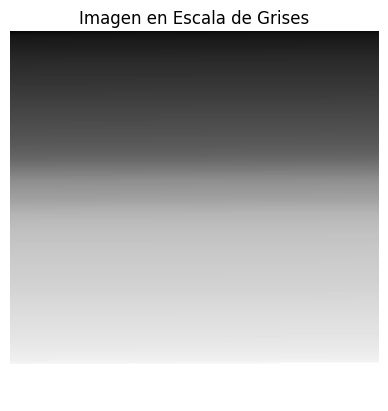

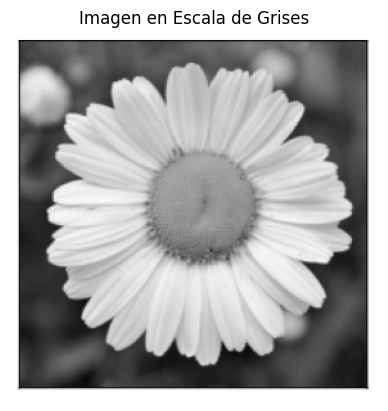

In [4]:
rutas = [ruta_1, ruta_2]

for ruta in rutas:
    # Define la ruta a la carpeta con las imagenes
    imagen_gris = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)

    # Visualizar la imagen usando Matplotlib
    plt.imshow(imagen_gris, cmap='gray')
    plt.title('Imagen en Escala de Grises')
    plt.axis('off')
    plt.show()


2 - Histogramas:

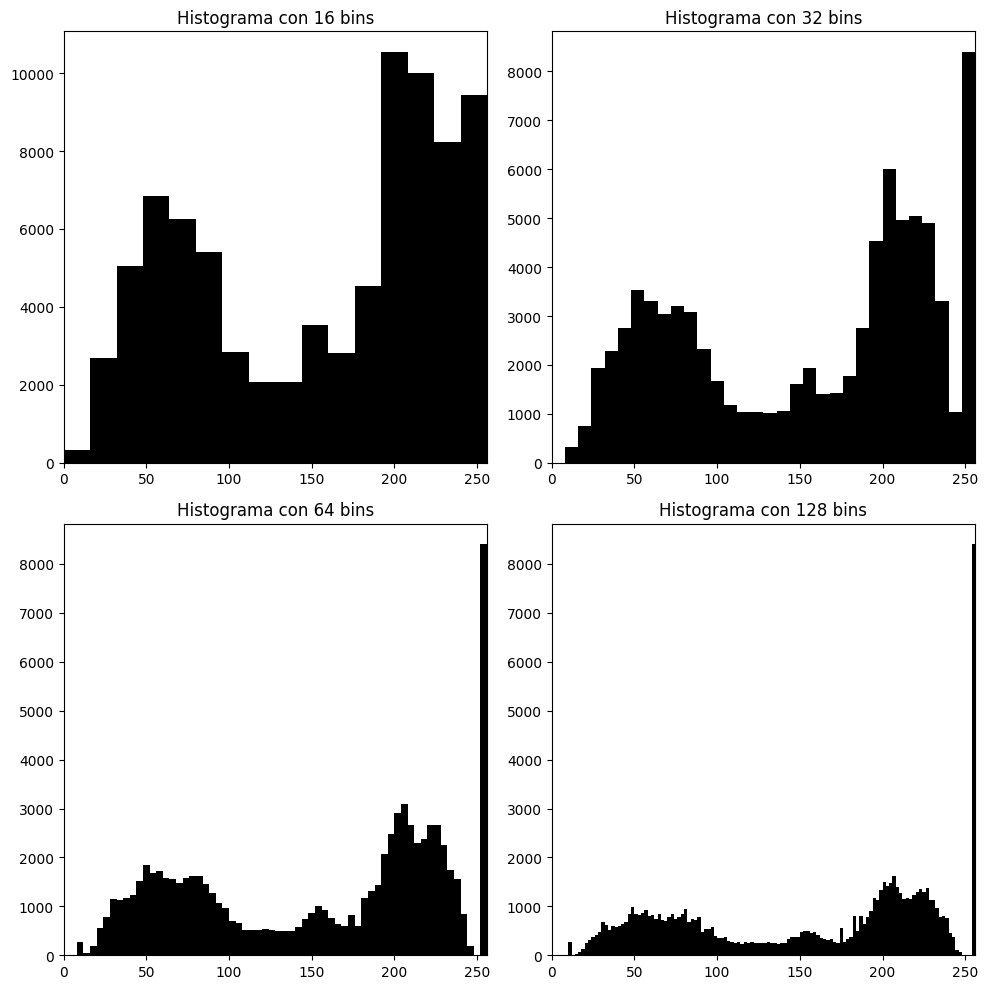

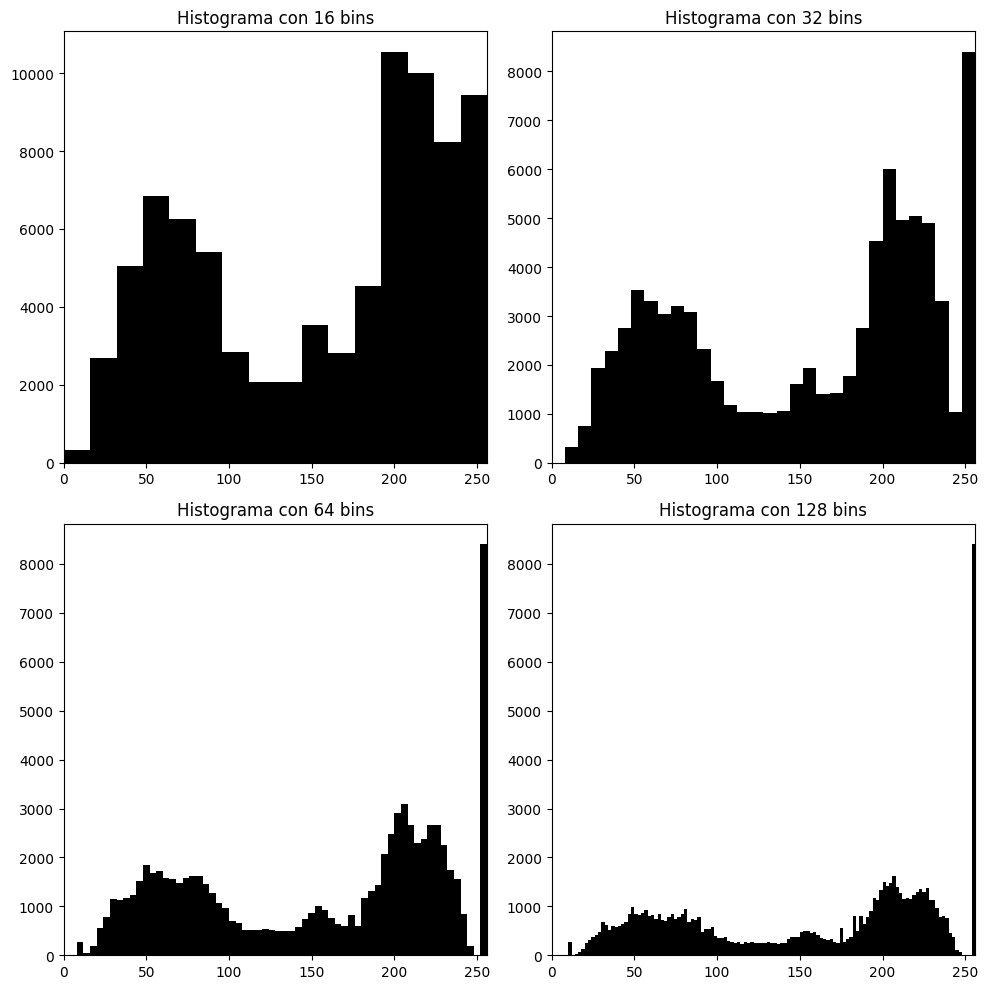

In [5]:
for ruta in rutas:
    # Lee la imagen en escala de grises
    imagen_gris = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)

    # Define diferentes numeros de bins
    bins_list = [16, 32, 64, 128]

    # Crea un panel 2x2 para las figuras
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    # Aplana la lista de ejes para un facil acceso
    axes = axes.ravel()

    # Calcula y plotea el histograma para cada numero de bins
    for i, bins in enumerate(bins_list):
        axes[i].hist(imagen_gris.ravel(), bins=bins, range=[0, 256], color='black')
        axes[i].set_title(f'Histograma con {bins} bins')
        axes[i].set_xlim([0, 256])

    # Ajusta el layout para que no haya superposicion
    plt.tight_layout()

    # Muestra la figura
    plt.show()


Observaciones: Resulta una buena opción trabajar con 32 bins para mantener continuidad y suavudad en el dominio.

Análisis: Si bien las imagenes muestran un panorama muy diferentes, sus histogramas de intensidad son idénticos.

Además, un histograma en escala de grises cuenta el número de píxeles que tienen un valor específico de intensidad (de 0 a 255) en la imagen, pero no captura la distribución espacial de esos valores. Es decir, dos imágenes con contenidos visualmente muy diferentes pueden tener distribuciones de intensidad similares, lo que resulta en histogramas idénticos.

Dado que los histogramas pierden información espacial y de contexto, no serían adecuados como única característica para entrenar un modelo de clasificación o detección de imágenes. Sin embargo, podrían ser útiles como una parte de un conjunto más amplio de features.

3 - Segmentación:

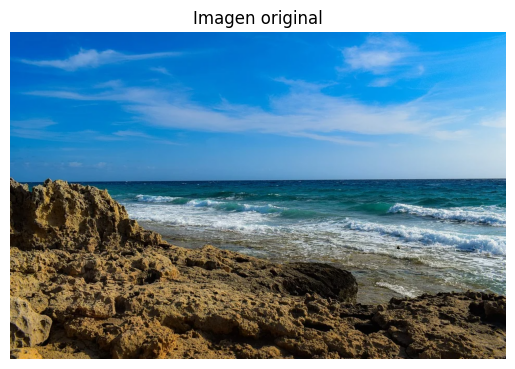

In [12]:
# Lee la imagen en escala de grises
imagen = cv2.imread(ruta_3)

# Convierte la imagen de BGR (por defecto en OpenCV) a RGB
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Visualiza la imagen usando Matplotlib
plt.imshow(imagen_rgb)
plt.title('Imagen original')
plt.axis('off')
plt.show()


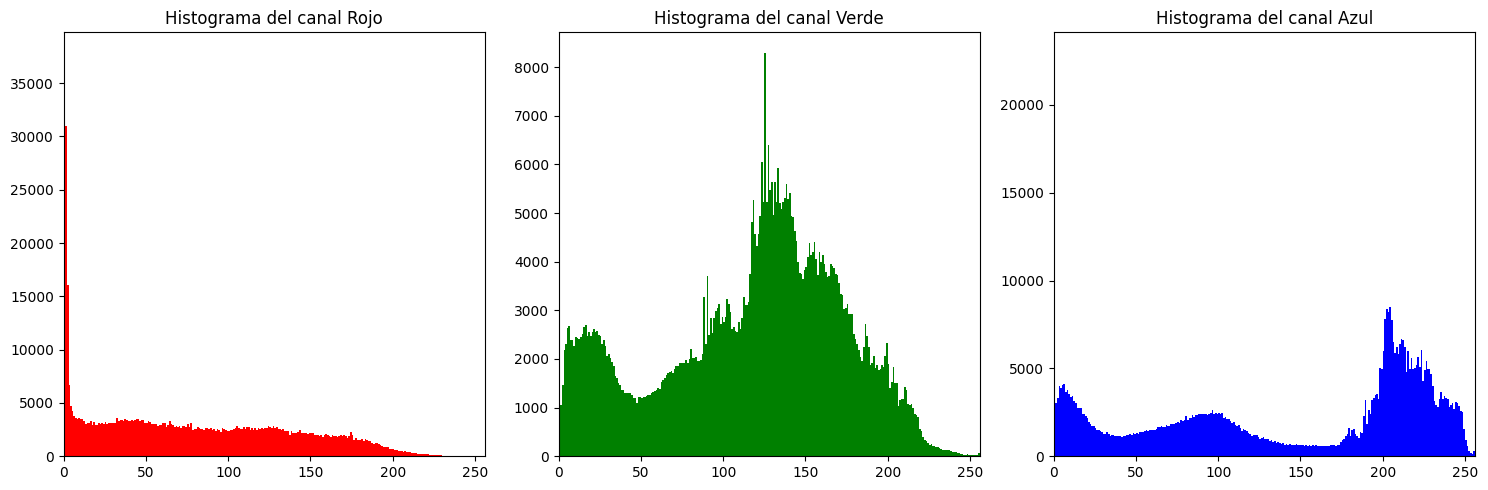

In [13]:
# Separa los canales de color
R, G, B = cv2.split(imagen_rgb)

# Crea un panel de 1x3 para mostrar los histogramas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Colores para cada canal
colors = ['red', 'green', 'blue']
channels = [R, G, B]
titles = ['Histograma del canal Rojo', 'Histograma del canal Verde', 'Histograma del canal Azul']

# Genera y muestra los histogramas
for i, (channel, color, title) in enumerate(zip(channels, colors, titles)):
    axes[i].hist(channel.ravel(), bins=256, range=[0, 256], color=color)
    axes[i].set_title(title)
    axes[i].set_xlim([0, 256])

# Ajusta el layout para evitar superposiciones
plt.tight_layout()

# Muestra el grafico
plt.show()

#### Histograma del canal Rojo:

Muestra un pico pronunciado al inicio, cerca de 0 en el eje de intensidad, lo que indica que hay muchos píxeles con valores de rojo de intensidad muy bajas. A medida que se avanza hacia intensidades más altas, la cantidad de píxeles disminuye gradualmente. La imagen parece contener una cantidad significativa de áreas oscuras o sombras con contribución del canal rojo. La distribución sugiere que hay pocos píxeles con intensidades altas de rojo.
Por último, es el canal que presenta en menor rango dinámico.

#### Histograma del canal Verde:

Es más equilibrado en comparación con el canal rojo. Tiene dos picos prominentes: uno alrededor de la intensidad 5-25 y otro más pronunciado alrededor de 120-140. Este último pico es el más alto en comparación con el resto de los canales. En general, el canal verde tiene una contribución más significativa en la imagen, con una amplia gama de intensidades. Esto podría indicar que la imagen tiene muchas áreas verdes o que la luz que ilumina la escena tiene un componente verde fuerte.

#### Histograma del canal Azul:

Muestra un primer pico en el rango de intensidades bajas (cerca de 5-15), seguido de una caída y luego un aumento en intensidades más altas, con otro pico alrededor de 190-210. La presencia de un pico en las intensidades altas sugiere que hay áreas en la imagen con colores azules brillantes o claras, mientras que la menor intensidad indica que también existen áreas oscuras con presencia de azul. Esto podría implicar que la imagen tiene una mezcla de tonos azules oscuros y claros. Al parecer el rango dinámico del canal azul es ligeramente mayor al verde.

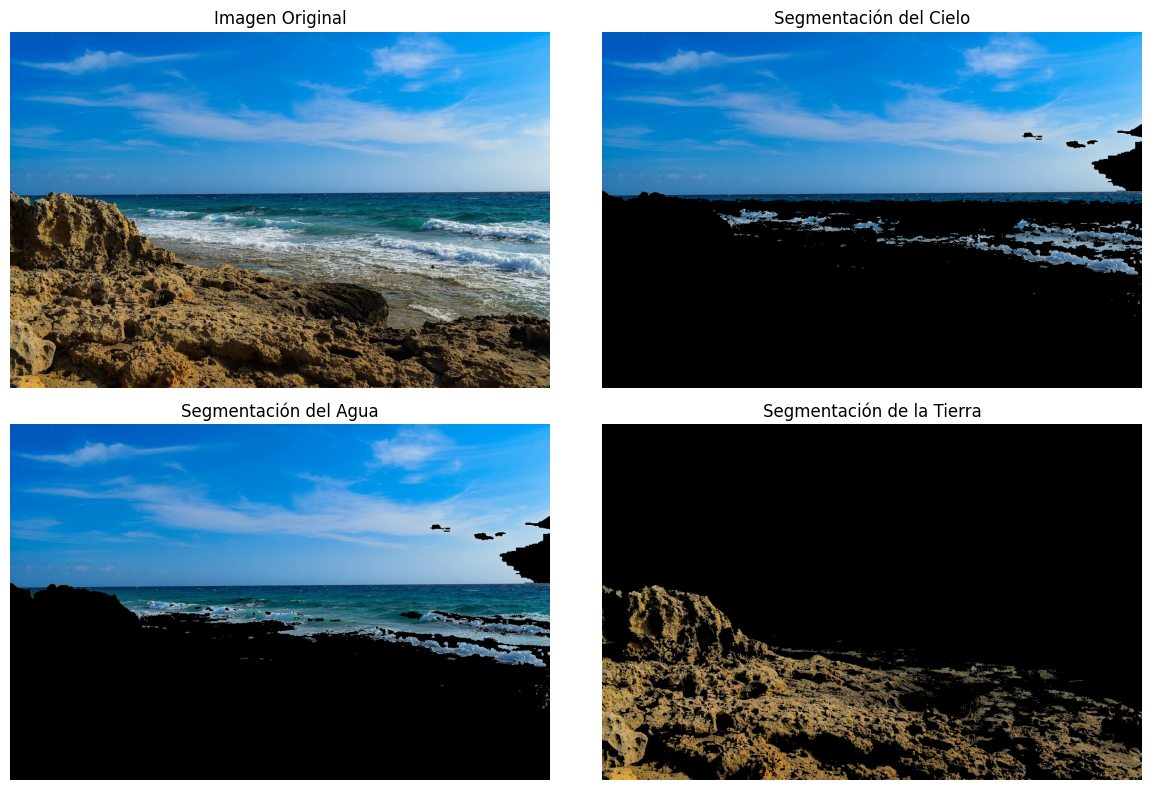

In [17]:

# Convierte la imagen de BGR a HSV
imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

# Define los rangos de color para segmentar diferentes elementos

# Rango para el cielo (usualmente azul claro)
lower_sky = np.array([100, 50, 50])
upper_sky = np.array([140, 255, 255])

# Rango para el agua (puede ser similar al cielo pero mas oscuro o con una saturacion diferente)
lower_water = np.array([90, 50, 50])
upper_water = np.array([130, 255, 255])

# Rango para la tierra (usualmente tonos marrones o verdes oscuros)
lower_land = np.array([15, 50, 50])
upper_land = np.array([40, 255, 255])

# Crea mascaras para cada elemento
mask_sky = cv2.inRange(imagen_hsv, lower_sky, upper_sky)
mask_water = cv2.inRange(imagen_hsv, lower_water, upper_water)
mask_land = cv2.inRange(imagen_hsv, lower_land, upper_land)

# Aplica las mascaras a la imagen original
sky_segmented = cv2.bitwise_and(imagen, imagen, mask=mask_sky)
water_segmented = cv2.bitwise_and(imagen, imagen, mask=mask_water)
land_segmented = cv2.bitwise_and(imagen, imagen, mask=mask_land)

# Muestra los resultados en un panel 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Muestra la imagen original
axes[0, 0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Imagen Original')
axes[0, 0].axis('off')

# Muestra el segmento del cielo
axes[0, 1].imshow(cv2.cvtColor(sky_segmented, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Segmentación del Cielo')
axes[0, 1].axis('off')

# Muestra el segmento del agua
axes[1, 0].imshow(cv2.cvtColor(water_segmented, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Segmentación del Agua')
axes[1, 0].axis('off')

# Muestra el segmento de la tierra
axes[1, 1].imshow(cv2.cvtColor(land_segmented, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Segmentación de la Tierra')
axes[1, 1].axis('off')

# Ajusta el layout y muestra el panel
plt.tight_layout()
plt.show()


Observaciones y conclusiones: En este ejemplo se pudo diferenciar bastante bien la tierra del resto de la imagen, dado que en este caso no tiene vegetación, si hubiese sido el caso es posible que se hubiera tomado parte del mar. Por otro lado, los mayores problemas para segmentar están en el cielo y el mar, dado que ambos trabajan con el color azul. En particular resultó más difícil lograr generar una máscara de cielo para segmentar el mar (imagen inferior izquierda).